In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

In [67]:
#reading csv files 
df=pd.read_csv("train.csv")

In [68]:
#looking at the top 5 data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
# looking at the datatypes of all columns 
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [70]:
#changing datatypes of  SibSp to float,Parch to Float and Passenger ID to float using astype for temporary usage.

df['Parch']=df['Parch'].astype('float64')
df['SibSp']=df['SibSp'].astype('float64')
df['PassengerId']=df['PassengerId'].astype('float64')

In [71]:
##checking whether the datatypes are changed accordingly
df.dtypes

PassengerId    float64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp          float64
Parch          float64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [72]:
#checking for the null values 
#there are total of 891 rows 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(5), int64(2), object(5)
memory usage: 83.7+ KB


Here we can see among 12 columns there is null values in column age , Cabin and embarked.

In [73]:
## making sure if age, cabin and embarked contains null values
df.isnull().sum()*100/df.shape[0]

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Here we can see Age contains 19.86 % null values while Embarked contains 0.22% null values and Cabin contains the highest amount of null values with 77.1%

In [74]:
#filling null values in age with mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [75]:
# to fill embarked column checking the value that appears most often and filling with that 
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [76]:
# filling embarked with S
df['Embarked'] = df['Embarked'].fillna('S')

In [77]:
#### Drop the Cabin column as there are many null values and it does not help in making prediction
df.drop('Cabin',axis=1,inplace=True)

In [78]:
## once again checking whether the null values are filled or not in df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(5), int64(2), object(4)
memory usage: 76.7+ KB


Therefore all null values are filled and unnecessary column is removed.

In [79]:
#checking for duplicates
sum(df.duplicated(subset = 'PassengerId'))

0

There are no duplicates. But incase of duplicates to remove duplicates we can use : 
df=df.drop_duplicates(keep='first')

In [80]:
#changing datatypes of age to integer 
df['Age']=df['Age'].astype('int64')

In [81]:
##dropping irrelevant columns
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1.0,0.0,7.2500,S
1,1,1,female,38,1.0,0.0,71.2833,C
2,1,3,female,26,0.0,0.0,7.9250,S
3,1,1,female,35,1.0,0.0,53.1000,S
4,0,3,male,35,0.0,0.0,8.0500,S


In [82]:
## summary statistics of each column
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.544332,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.013778,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Summary statistics of 6 columns.

# EDA (Exploratory Data Analysis)
It is a method used to analyze and summarize datasets.


### Piechart


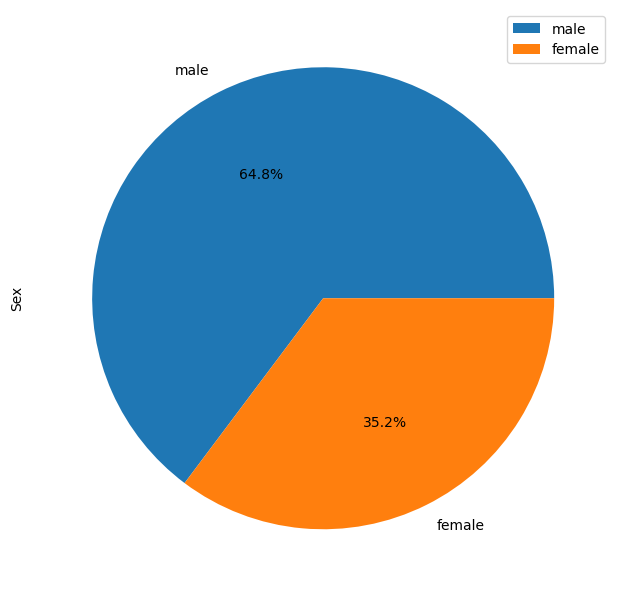

<Figure size 640x480 with 0 Axes>

In [106]:
df_sym = pd.DataFrame(df['Sex'].value_counts())
df_sym.plot.pie(subplots=True,labels = df_sym.index.values, autopct='%1.1f%%', figsize = (15,7.5))
# Unsquish the pie.
plt.gca().set_aspect('equal')
plt.show()
plt.tight_layout()

We can see that there are more male than female.

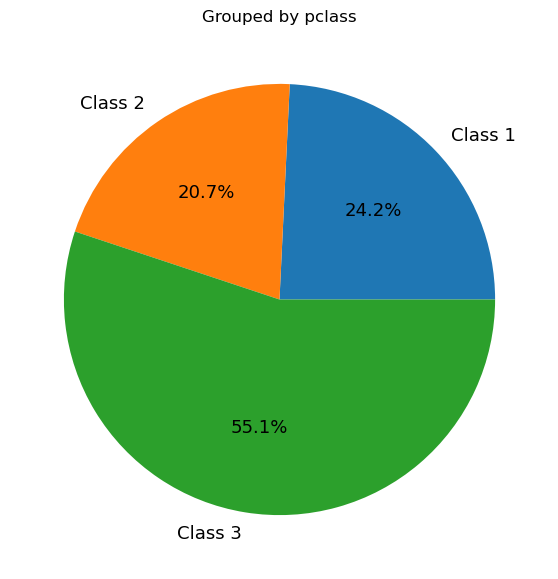

In [107]:
pclass_count = df.groupby('Pclass')['Pclass'].count()
pclass_count
plt.figure(figsize=(7,7))
plt.title('Grouped by pclass')
plt.pie(pclass_count.values, labels=['Class 1', 'Class 2', 'Class 3'], 
 autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

There are more people in class 3.


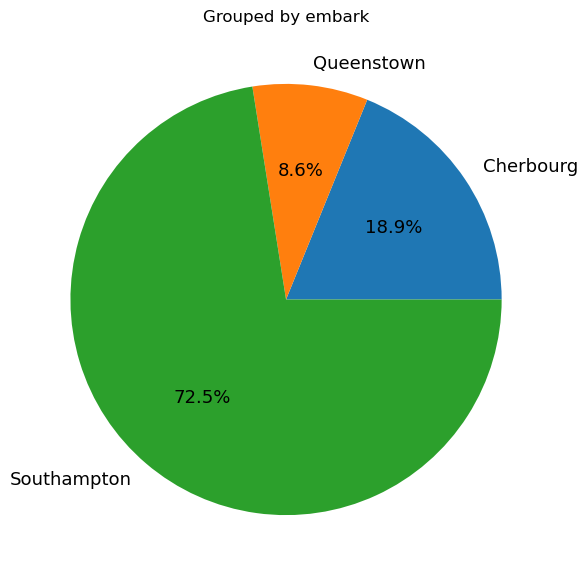

In [108]:
# Group the data frame by classes in the pclass column, and count the number of occurrences of each group.
embark_count = df.groupby('Embarked')['Embarked'].count()
plt.figure(figsize=(7,7))
plt.title('Grouped by embark')
plt.pie(embark_count.values, labels=['Cherbourg', 'Queenstown', 'Southampton'], 
        autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

There are more people from Southampton

### Barplot
The barplot() shows the relation between a categorical variable and a continuous variable. The data is represented in rectangular bars where the length the bar represents the proportion of the data in that category. Bar plot represents the estimate of central tendency.

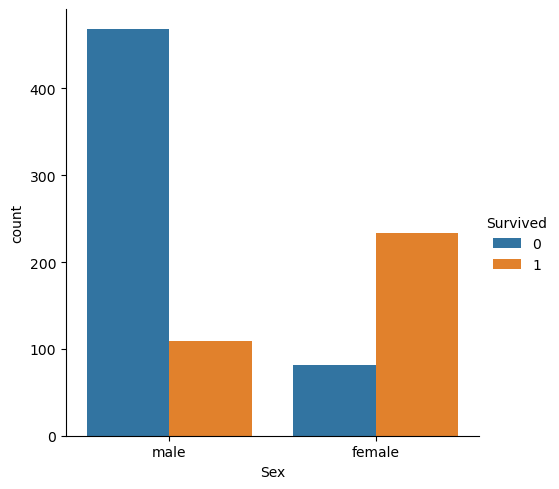

In [86]:
##checking whether there is relation between survival and gender
sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = df)

Just by observing the graph, it can be approximated that the survival rate of men is around 20% and that of women is around 75%. Therefore, whether a passenger is a male or a female plays an important role in determining if one is going to survive.

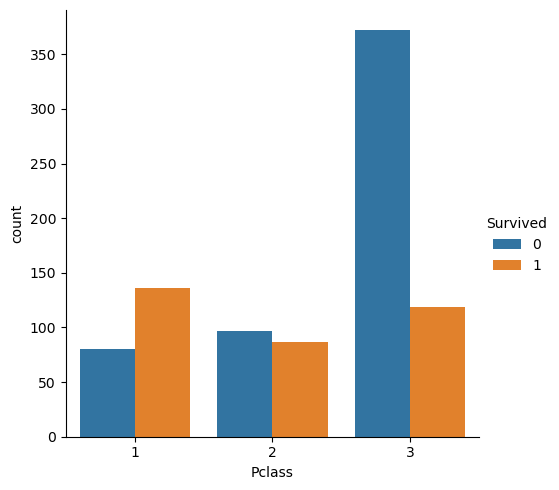

In [88]:
##checking whether there is relation between survival and Pclass
sns.catplot(x ="Pclass", hue ="Survived",
kind ="count", data = df)

We can see that survival rate is higher in class 1.

<AxesSubplot:xlabel='Fare_Range', ylabel='Survived'>

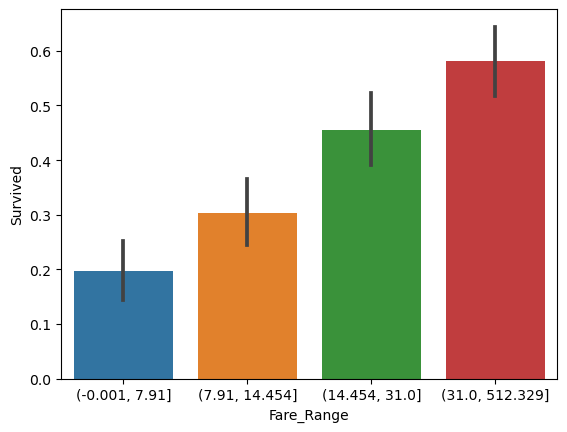

In [96]:

# Divide Fare into 4 bins
df['Fare_Range'] = pd.qcut(df['Fare'], 4)
 
# Barplot - Shows approximate values based
# on the height of bars.
sns.barplot(x ='Fare_Range', y ='Survived',
data = df)

Fare denotes the fare paid by a passenger. As the values in this column are continuous, they need to be put in separate bins(as done for Age feature) to get a clear idea. It can be concluded that if a passenger paid a higher fare, the survival rate is more.

<AxesSubplot:xlabel='Age_Range', ylabel='Survived'>

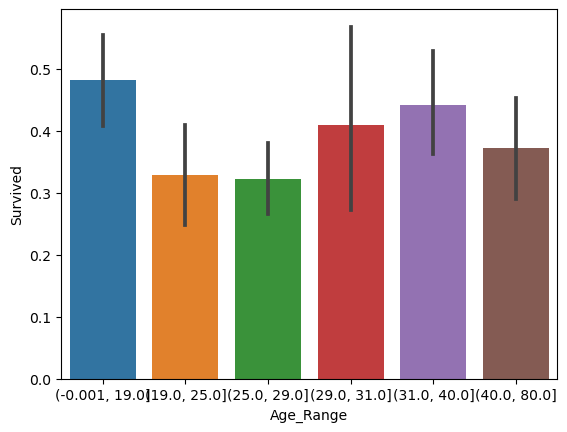

In [100]:

# Divide Age into 4 bins
df['Age_Range'] = pd.qcut(df['Age'], 6)
 
# Barplot - Shows approximate values based
# on the height of bars.
sns.barplot(x ='Age_Range', y ='Survived',
data = df)

We can see that the survival rate of people of age 19-30 is significantly loer than others.

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


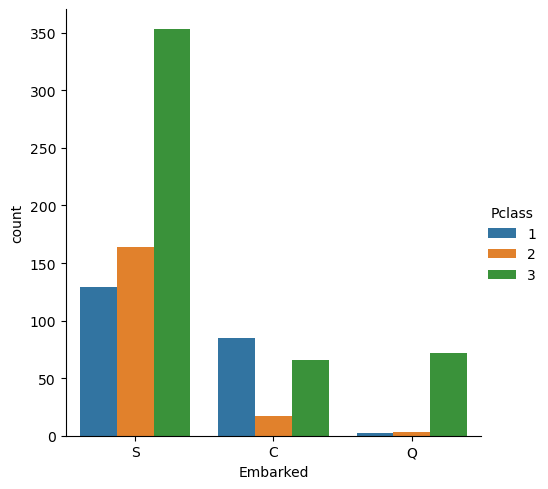

In [111]:
sns.catplot("Embarked", data=df, kind='count',hue='Pclass', row_order=['C','Q','S']);

Comparatively Most people from QueenStown took class 3 .

### Heatmap 


<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

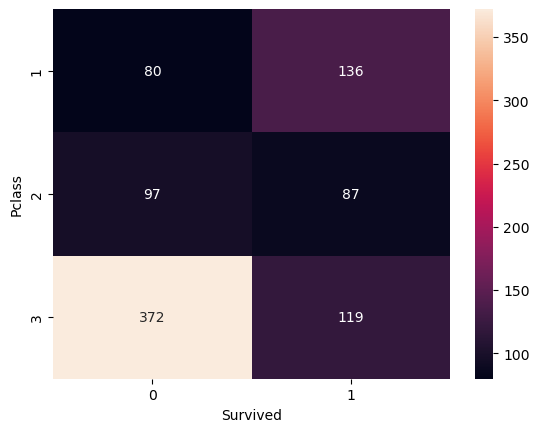

In [90]:
# Group the dataset by Pclass and Survived and then unstack them
group = df.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")

It helps in determining if higher-class passengers had more survival rate than the lower class ones or vice versa. Class 1 passengers have a higher survival chance compared to classes 2 and 3. It implies that Pclass contributes a lot to a passenger’s survival rate

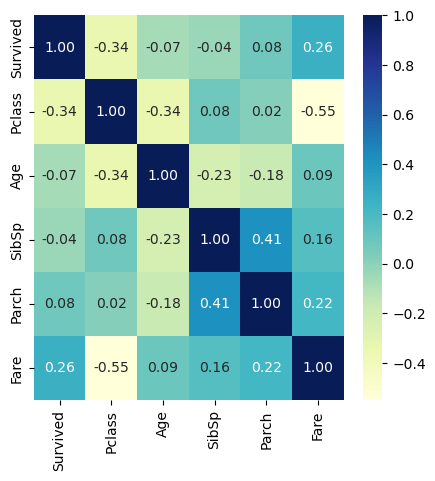

In [94]:
## checking correlation between different columns
plt.subplots(figsize=(5, 5))
sns.heatmap(df.corr(), cmap = "YlGnBu", annot=True, fmt=".2f")
plt.show()

### Point plot

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


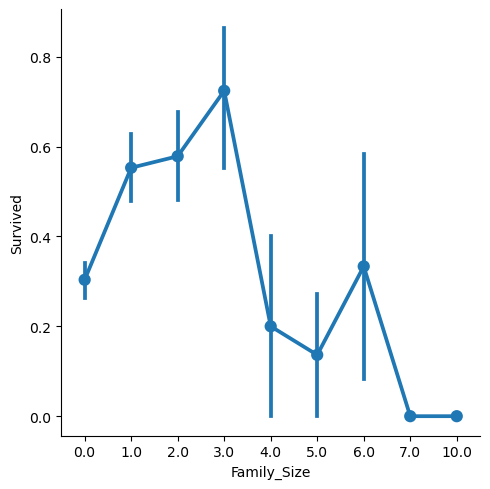

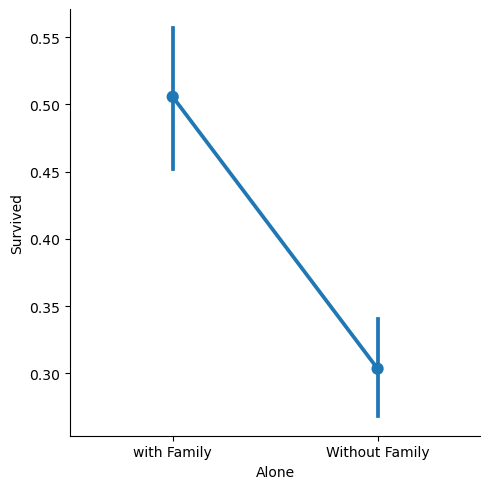

In [119]:
df['Family_Size'] = 0
df['Family_Size'] = df['Parch']+df['SibSp']
 
# Adding a column Alone
df['Alone'] = 'with Family'
df.loc[df.Family_Size == 0, 'Alone'] = 'Without Family'
 
# Factorplot for Family_Size
sns.factorplot(x ='Family_Size', y ='Survived', data = df)
 
# Factorplot for Alone
sns.factorplot(x ='Alone', y ='Survived', data = df)

Family_Size denotes the number of people in a passenger’s family. It is calculated by summing the SibSp and Parch columns of a respective passenger. Also, another column Alone is added to check the chances of survival of a lone passenger against the one with a family.

Important observations – 

* If a passenger is alone, the survival rate is less.
* If the family size is greater than 5, chances of survival decrease considerably.

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


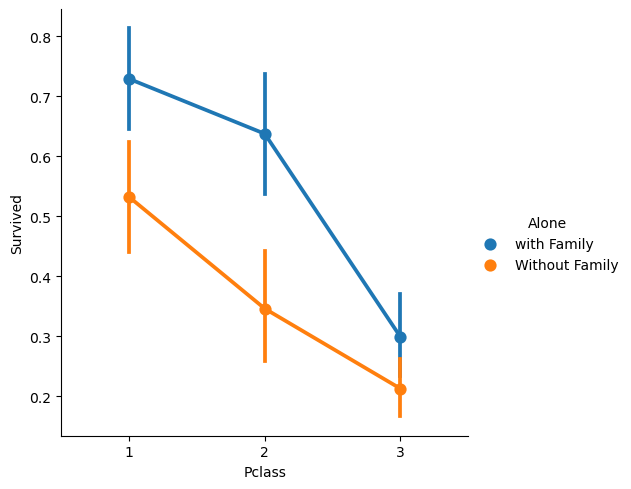

In [120]:
sns.factorplot('Pclass','Survived',data=df,hue='Alone')

The survival rates are higher if they are with family.

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


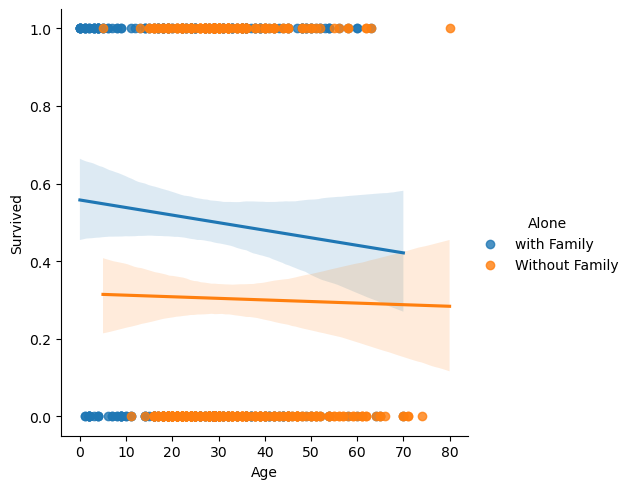

In [121]:
sns.lmplot('Age','Survived',data=df,hue='Alone')

With increase in age there is decrease in survival rates. However Survival rate is higher with family

<AxesSubplot:>

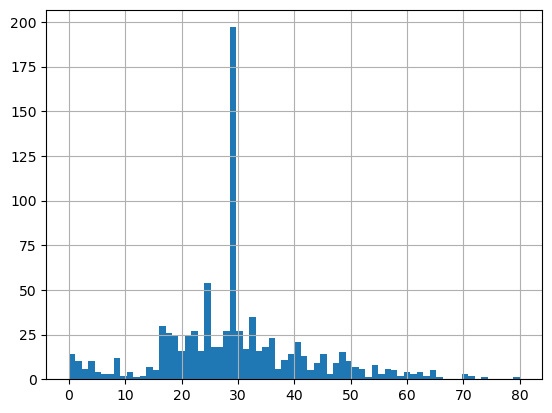

In [103]:
# check the ages of the passengers to look at the distribution
df['Age'].hist(bins=70)

We can see most of the passengers were young and were in between 20–30 years of age.

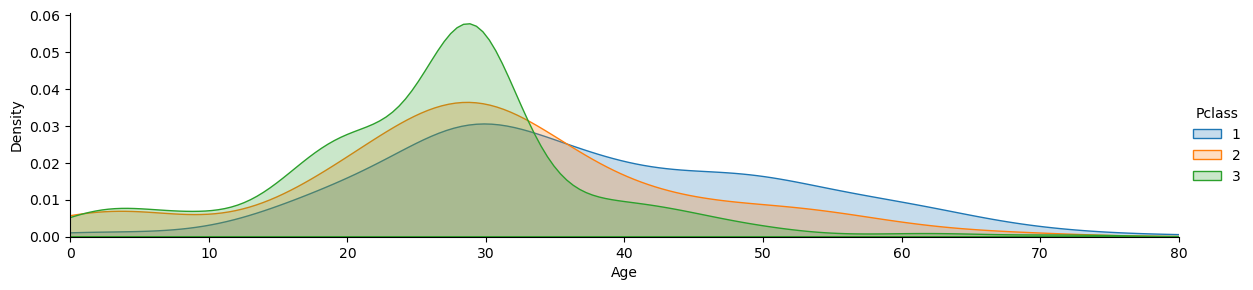

In [104]:

fig = sns.FacetGrid(df, hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend();

Similarly we can see most people of age 20 -30 were on class 3 

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: module 'seaborn' has no attribute 'plt'

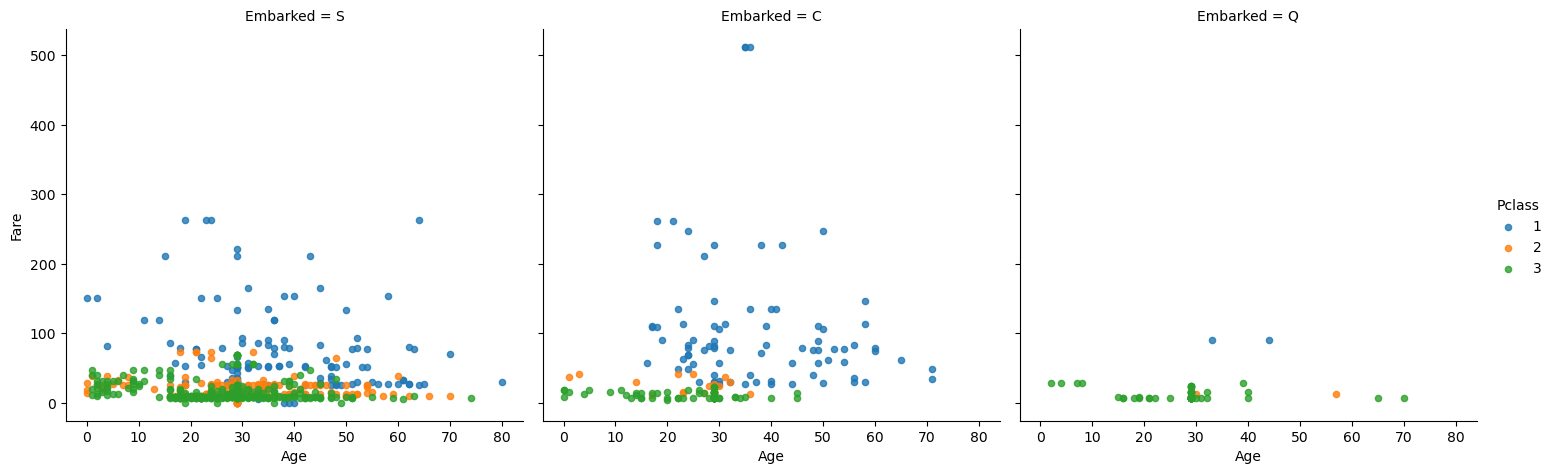

In [112]:
sns.lmplot('Age', 'Fare', data=df, fit_reg=False, hue="Pclass", col="Embarked", scatter_kws={"marker": ".", "s": 20})
plt.subplots_adjust(top=0.9)
sns.plt.suptitle('Scatterplot of passengers w.r.t Fare and Age for diff. ports', fontsize=16)

Important Observations:
   * More numbers of males.
   * Survival rate higher of females.
   * More people from age 20-30.
   * More people from Southampton.
   * More people in Class 3.
   * More alone people in Class 3.
   * Comparatively More people from QueenStone in class 3.
   * Higher survival in Class 1 .
   * Cheaper fair in class 3. 
   * Least Survival in class 3.

Conclusion:

There were more number of males than females but we can see out of all male passengers most of them died. And out of all Female passengers, most of them survived.So we could say a male passenger has a higher chance to die and female passengers have a higher chance to survive.Maybe priorities were given to female passengers so the chances of survival for female passengers is increased than male passengers.Passengers who have age <20 years so childrens or teenagers, out of the numbers of passengers who survived is greater than numbers of people who died. This means while Rescuing priorities were given to children or teenagers.Persons who have age >20 years and <45 years. Out of the numbers of passengers who died is greater than numbers of passengers who survived. But people with an age greater than 65 almost all of them died.In the above output plot, we can see Persons who were traveling in 3rd class, most of them died or can not survived than other class passengers.Persons who were traveling in 2nd class, out of them almost equal number of people died and survived.Persons who were traveling in 1st class, out of a large number of people survived and also a fair number of persons died.Passengers who paid low fare have a higher chance to die. On the other hand, passengers who paid high fair have a higher chance to survive.Passengers who started his journey from Southampton, most of them died.However, there is not much difference in people surviving or dying chances on the basis who started their journey from Cherbourg, Queenstown.

## Checking for outliers

In [52]:
##checking outliers for age
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
Age_outliers = df[(df['Age'] < Q1 - whisker_width*IQR) | (df['Age'] > Q3 + whisker_width*IQR)]
Age_outliers.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
7,0,3,male,2,3.0,1.0,21.075,S
11,1,1,female,58,0.0,0.0,26.550,S
15,1,2,female,55,0.0,0.0,16.000,S
16,0,3,male,2,4.0,1.0,29.125,Q
33,0,2,male,66,0.0,0.0,10.500,S


In [49]:
## checking outliers for Fare
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
Fare_outliers = df[(df['Fare'] < Q1 - whisker_width*IQR) | (df['Fare'] > Q3 + whisker_width*IQR)]
Fare_outliers.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38,1.0,0.0,71.2833,C
27,0,1,male,19,3.0,2.0,263.0000,S
31,1,1,female,29,1.0,0.0,146.5208,C
34,0,1,male,28,1.0,0.0,82.1708,C
52,1,1,female,49,1.0,0.0,76.7292,C


In [59]:
print('skewness value of Age: ',df['Age'].skew())
print('skewness value of Fare: ',df['Fare'].skew())

skewness value of Age:  0.45956263424701577
skewness value of Fare:  4.787316519674893


The skewness value should be within the range of -1 to 1 for a normal distribution, any major changes from this value indicates the presence of extreme value or outlier.

From the code above, the ‘Fare’ skewness value of 4.78 shows the variable has been rightly skewed, indicating the presence of outliers.

## Checking outliers using visualization

### Boxplot
Boxplot is a visualization tool for identifying outliers, it displays the distribution of statistical observations, its body is classified into four parts; the lowest and the highest(minimum and maximum), the 25 percentile(first quartile(Q1)), the median(50th percentile), the 75th percentile(third quartile(Q3)).

Outliers appears above or below the minimum and maximum of the boxplot.



C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

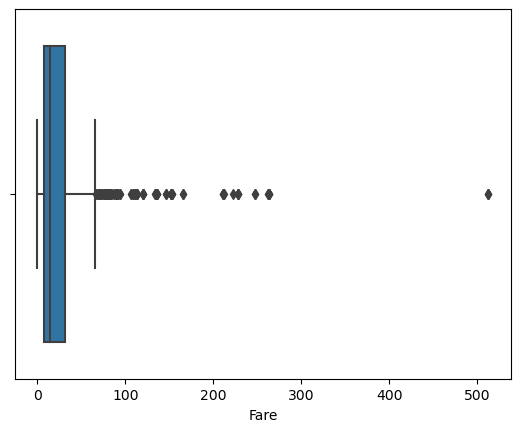

In [55]:
sns.boxplot(df['Fare'],data=df)

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

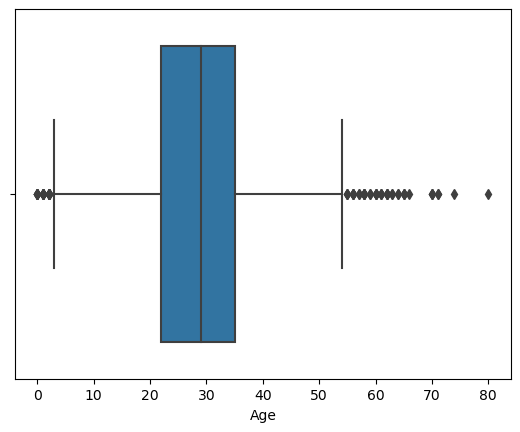

In [56]:
sns.boxplot(df['Age'],data=df)

From the boxplot above, the black circular points which are indicated by an arrow show the presence of extreme values in the variable.

### Histogram
To visualize the distribution of a numerical variable, a histogram shows the direction in which these variables are distributed, outliers will appear outside the overall distribution of the data. if the histogram is right-skewed or left-skewed, it indicates the presence of extreme values or outliers.

<AxesSubplot:>

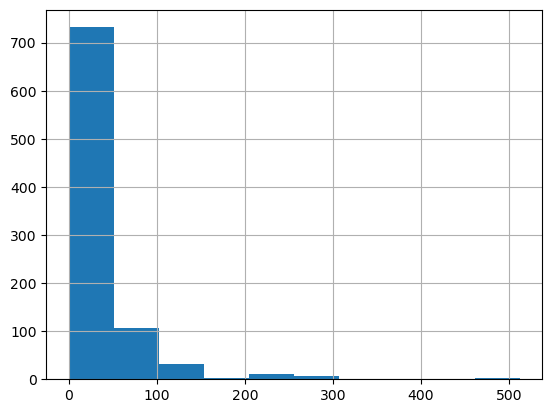

In [57]:
df['Fare'].hist()

From the histogram above, the histogram appears to be distributed to the left, this indicates the presence of outliers.

<AxesSubplot:>

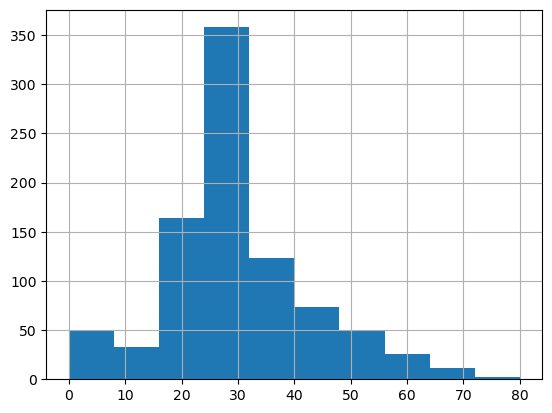

In [58]:
df['Age'].hist()

from the histogram above, the histogram appears to be distributed to the centre, this indicates the presence of outliers in both sides.

## Removing outliers 

In [61]:
#the code below drops the outliers by removing all the values that are below the 25th percentile and above the 75th percentile
#of the ‘Fare’ variable.
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['Fare']=np.where(df['Fare']>upper_whisker,upper_whisker,np.where(df['Fare']<lower_whisker,lower_whisker,df['Fare']))

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

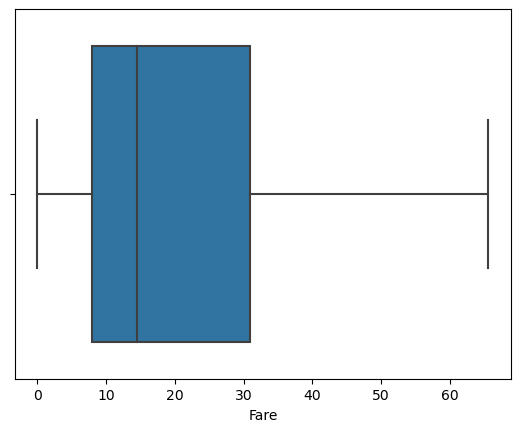

In [62]:
sns.boxplot(df['Fare'],data=df)

In [63]:
#the code below drops the outliers by removing all the values that are below the 25th percentile and above the 75th percentile
#of the ‘Age’ variable.
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['Age']=np.where(df['Age']>upper_whisker,upper_whisker,np.where(df['Age']<lower_whisker,lower_whisker,df['Age']))

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

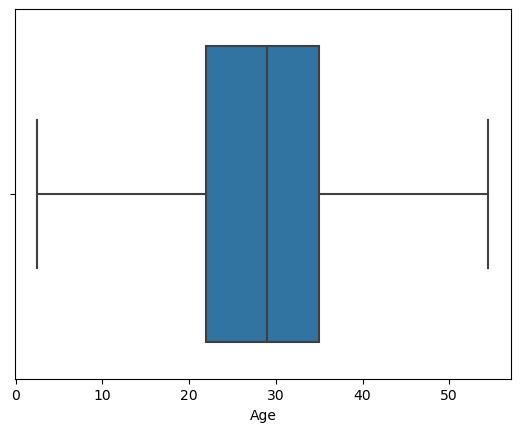

In [65]:
sns.boxplot(df['Age'],data=df)